# Customer segmentation using K-means clustering

In [1]:
#  importting thr libraies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


In [2]:
# importing the data base

df = pd.read_csv('Mall_Customers.csv',
                index_col=0,
                header=0)

In [3]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [4]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

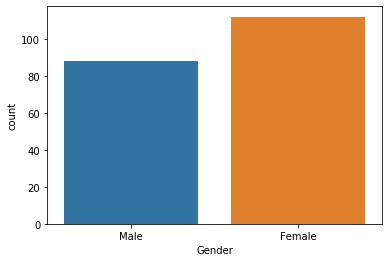

In [5]:
sns.countplot(x='Gender',data=df)
plt.show()

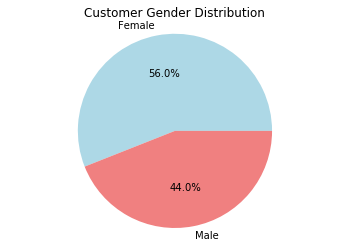

In [6]:

# Count the number of customers by gender
gender_counts = df['Gender'].value_counts()

# Pie chart data
labels = gender_counts.index
sizes = gender_counts.values
colors = ['lightblue', 'lightcoral']

# Create the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')

# Add a title
plt.title('Customer Gender Distribution')

# Display the chart
plt.axis('equal')
plt.show()


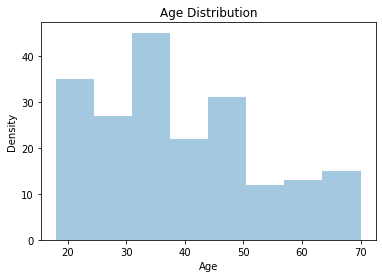

In [7]:
# Create a histogram using seaborn
sns.distplot(df['Age'], kde=False)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution')

# Display the plot
plt.show()




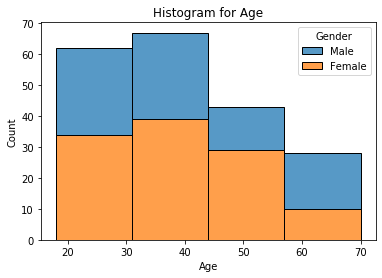

In [8]:
sns.histplot(data=df,x='Age',bins=4,hue='Gender',multiple='stack',kde=False)
plt.title('Histogram for Age')
plt.show()

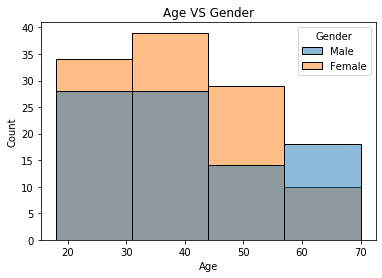

In [9]:
sns.histplot(data=df,x='Age',bins=4,hue='Gender',kde=False)
plt.title('Age VS Gender')
plt.show()

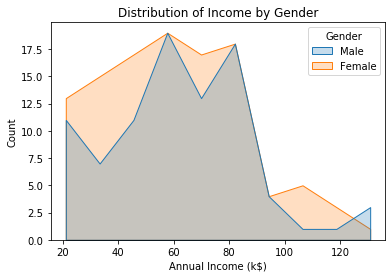

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a distribution plot for Annual Income with gender differentiation
sns.histplot(data=df, x='Annual Income (k$)', hue='Gender', element='poly')

# Add labels and title
plt.xlabel('Annual Income (k$)')
plt.ylabel('Count')
plt.title('Distribution of Income by Gender')

# Display the plot
plt.show()


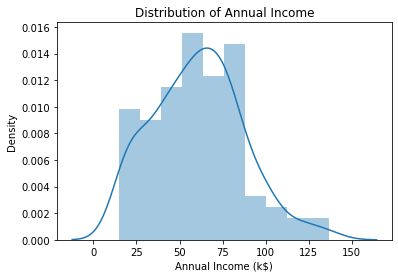

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Customer 


# Create a distribution plot for Annual Income
sns.distplot(df['Annual Income (k$)'])

# Add labels and title
plt.xlabel('Annual Income (k$)')
plt.ylabel('Density')
plt.title('Distribution of Annual Income')

# Display the plot
plt.show()


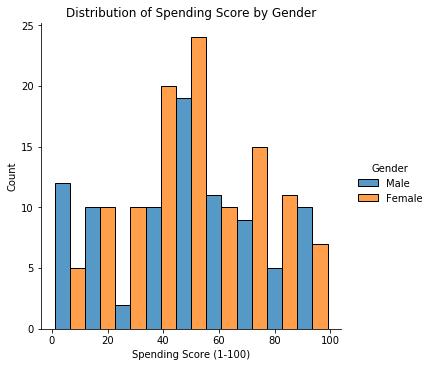

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame from the data
# df = pd.DataFrame(data)

# Create a grouped histogram for Spending Score with gender differentiation
sns.displot(data=df, x='Spending Score (1-100)', hue='Gender', multiple='dodge')

# Add labels and title
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Count')
plt.title('Distribution of Spending Score by Gender')

# Display the plot
plt.show()


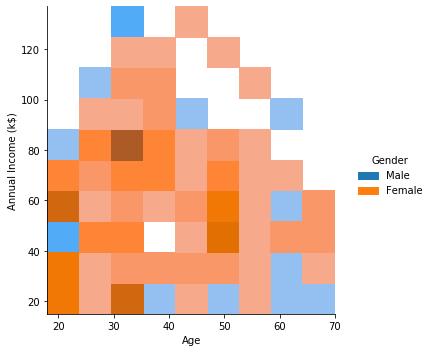

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame from the data
# df = pd.DataFrame(data)

# Create a grouped histogram for Spending Score with gender differentiation
sns.displot(data=df, x='Age', y='Annual Income (k$)', hue='Gender')


# Display the plot
plt.show()


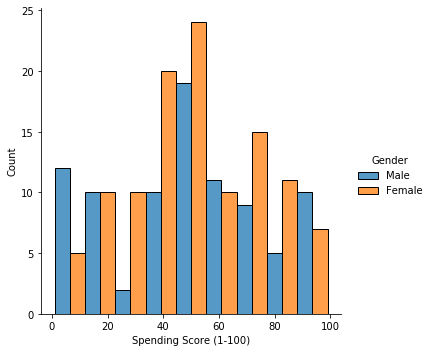

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd



# Create a DataFrame from the data
# df = pd.DataFrame(data)

# Create a grouped histogram for Spending Score with gender differentiation
sns.displot(df, x='Spending Score (1-100)', hue='Gender', multiple='dodge')

# Display the plot
plt.show()


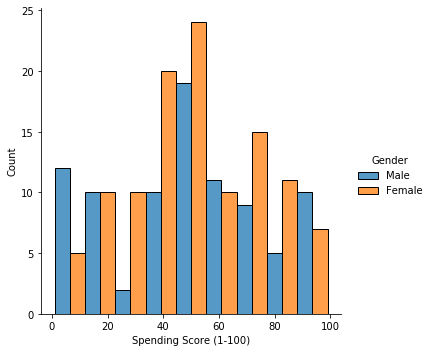

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd



# Create a DataFrame from the data
# df = pd.DataFrame(data)

# Create a grouped histogram for Spending Score with gender differentiation
sns.displot(df, x='Spending Score (1-100)', hue='Gender', multiple='dodge')

# Display the plot
plt.show()


#  Data Preprocessing 

In [16]:
print(df.shape)
print(df.info())
print(df.isnull().sum())

(200, 4)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.9+ KB
None
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [17]:
df.describe(include='all')

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200,200.000000,200.000000,200.000000
unique,2,NaN,NaN,NaN
top,Female,NaN,NaN,NaN
freq,112,NaN,NaN,NaN
mean,NaN,38.850000,60.560000,50.200000
std,NaN,13.969007,26.264721,25.823522
min,NaN,18.000000,15.000000,1.000000
25%,NaN,28.750000,41.500000,34.750000
50%,NaN,36.000000,61.500000,50.000000
75%,NaN,49.000000,78.000000,73.000000


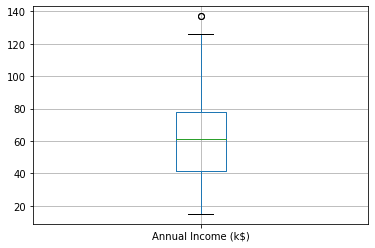

In [18]:
df.boxplot('Annual Income (k$)')

In [19]:
X = df.iloc[:,2:4]



In [20]:
%%time
from sklearn.cluster import KMeans

K_MAX = 11

wsse=[]
for i in range(1,K_MAX):
    kmeans=KMeans(n_clusters=i,random_state=10)
    kmeans.fit(X)
    wsse.append(kmeans.inertia_)
    


Wall time: 888 ms


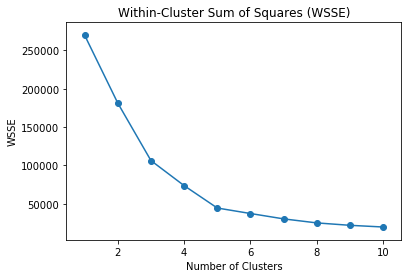

In [21]:
import matplotlib.pyplot as plt



# Plotting the WSSE values
plt.plot(range(1, K_MAX), wsse)
plt.scatter(range(1, K_MAX), wsse)

# Adding labels and title
plt.xlabel('Number of Clusters')
plt.ylabel('WSSE')
plt.title('Within-Cluster Sum of Squares (WSSE)')

# Display the plot
plt.show()


In [22]:
kmeans=KMeans(n_clusters=5,random_state=10)
Y_pred =kmeans.fit_predict(X)

In [23]:
Y_pred

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

In [24]:
kmeans.n_iter_

5

In [25]:
df['CLUSTERS']=Y_pred
df.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100),CLUSTERS
CustomerID,,,,,
1,Male,19,15,39,3
2,Male,21,15,81,0
3,Female,20,16,6,3
4,Female,23,16,77,0
5,Female,31,17,40,3
6,Female,22,17,76,0
7,Female,35,18,6,3
8,Female,23,18,94,0
9,Male,64,19,3,3


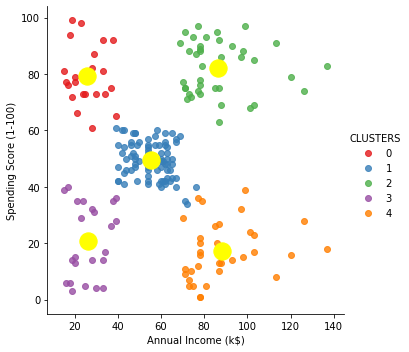

In [26]:


# Create a scatter plot with cluster coloring
sns.lmplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', fit_reg=False, hue='CLUSTERS', palette='Set1')

# Add scatter points for cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow')

# Display the plot
plt.show()


In [27]:
df['CLUSTERS'] = df.CLUSTERS.map({0: 'Careless', 1: 'Sensible', 2: 'Target', 3: 'Notusefull', 4: 'Careful'})


In [28]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),CLUSTERS
CustomerID,,,,,
1,Male,19,15,39,Notusefull
2,Male,21,15,81,Careless
3,Female,20,16,6,Notusefull
4,Female,23,16,77,Careless
5,Female,31,17,40,Notusefull


In [29]:
df.to_csv(r'targetcustomers.csv',index=True)

In [30]:
dada=pd.read_csv('targetcustomers.csv')

In [31]:
dada

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),CLUSTERS
0,1,Male,19,15,39,Notusefull
1,2,Male,21,15,81,Careless
2,3,Female,20,16,6,Notusefull
3,4,Female,23,16,77,Careless
4,5,Female,31,17,40,Notusefull
...,...,...,...,...,...,...
195,196,Female,35,120,79,Target
196,197,Female,45,126,28,Careful
197,198,Male,32,126,74,Target
198,199,Male,32,137,18,Careful
